NameError: name 'fit_p' is not defined

In [ ]:
import matplotlib.pyplot as plt
from scripts.fits import  fit_p
from models import ResNet
#import torch
from torch import device
from torch.nn import L1Loss
from torch.cuda import is_available
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR

device = device('cuda:0') if is_available else device('cpu')

suffix = "Nu_polar_ResNet_"
path_begin = "/home/leonov/Baikal/Gr_big_data"
epochs_num =20

model = ResNet(input_size = 5, output_size  = 2, device = device)
learn_rate =3e-3
opt = Adam(model.parameters(),lr=learn_rate)
sch_Exp = ExponentialLR(opt, gamma=0.9)

batch_size = 128

big_list = fit_p(
        model = model, scheduler_Exp = sch_Exp, optimizer = opt, device = device,
        epochs_num = epochs_num, batch_size = batch_size, tr_set_len = 4 * 512 * 100,
        criterion = L1Loss(),
        save = False,   
        suffix = suffix,
        path_begin = path_begin)

Parameters amount is  368915


  0%|          | 0/20 [00:00<?, ?it/s]

Indeed Epoch =  1     

  5%|▌         | 1/20 [06:32<2:04:13, 392.31s/it]

Indeed Epoch =  2     

 10%|█         | 2/20 [13:07<1:58:11, 393.98s/it]

Indeed Epoch =  3     

 15%|█▌        | 3/20 [19:38<1:51:11, 392.42s/it]

Indeed Epoch =  4     

 20%|██        | 4/20 [26:10<1:44:38, 392.39s/it]

Indeed Epoch =  5     

# Сеть

# Change lr

Num of sub-epochs in Epoch =  26 

Indeed Epoch =  1     Indeed Epoch =  2     Indeed Epoch =  3     Indeed Epoch =  4     Indeed Epoch =  5     Indeed Epoch =  6     Indeed Epoch =  7     Indeed Epoch =  8     Indeed Epoch =  9     Indeed Epoch =  10     Indeed Epoch =  11     Indeed Epoch =  12     Indeed Epoch =  13     Indeed Epoch =  14     Indeed Epoch =  15     Indeed Epoch =  16     Indeed Epoch =  17     Indeed Epoch =  18     Indeed Epoch =  19     Indeed Epoch =  20     Indeed Epoch =  21     Indeed Epoch =  22     Indeed Epoch =  23     Indeed Epoch =  24     Indeed Epoch =  25     Indeed Epoch =  26     Indeed Epoch =  28     Indeed Epoch =  29     Indeed Epoch =  30     Indeed Epoch =  31     Indeed Epoch =  32     Indeed Epoch =  33     Indeed Epoch =  34     Indeed Epoch =  35     

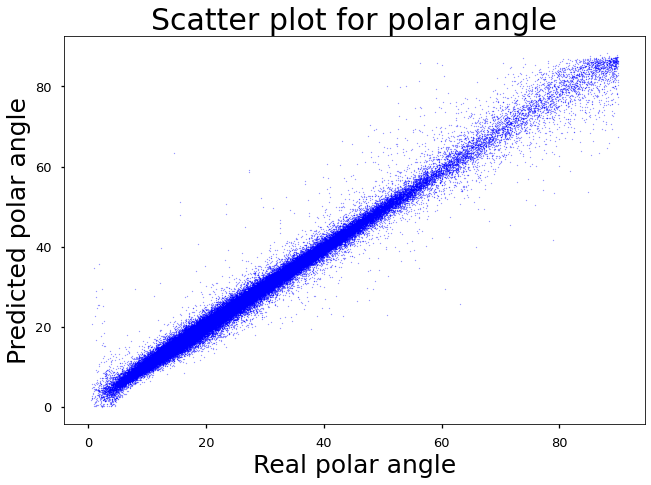

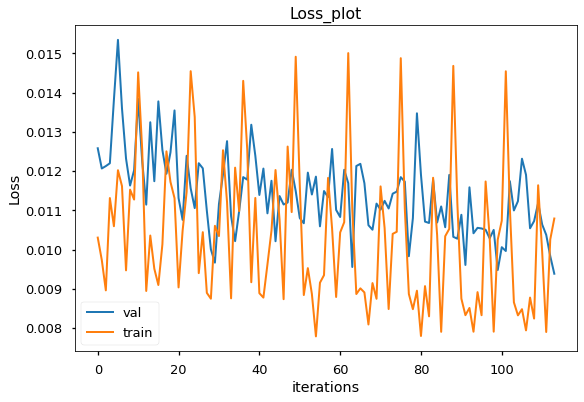

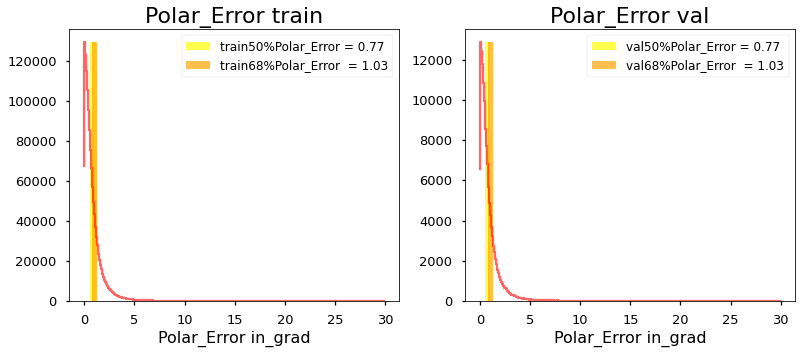

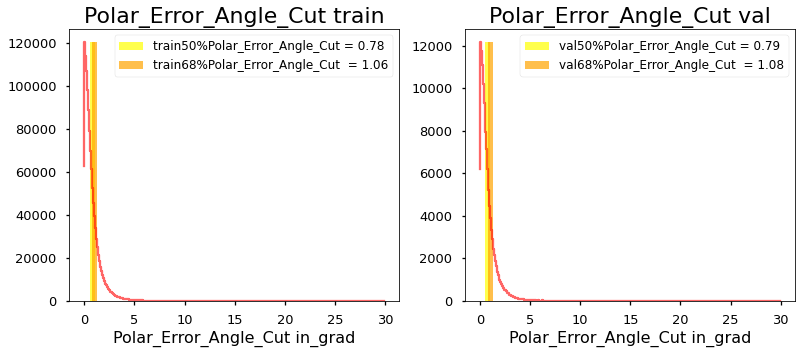

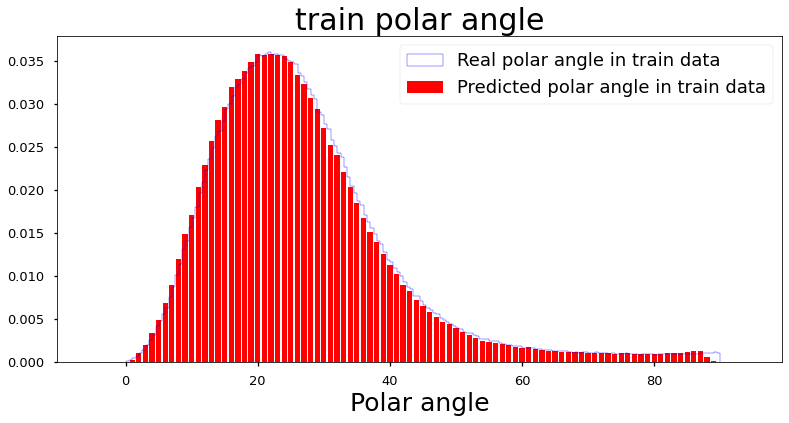

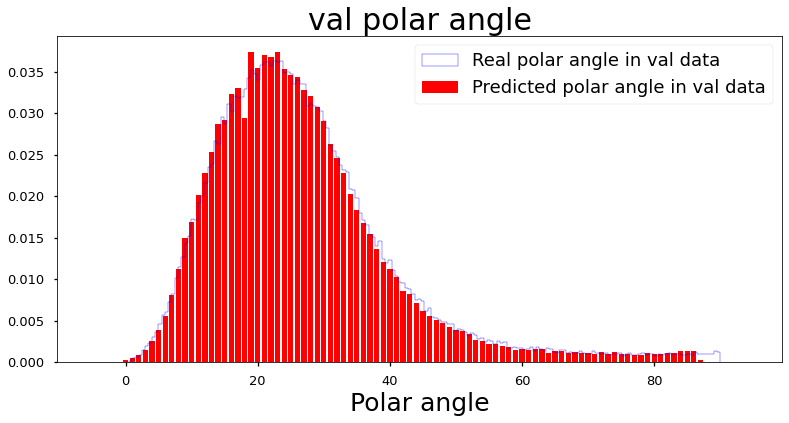

In [30]:
model = net_MC_data.to(device)
opt = torch.optim.Adam(model.parameters(),lr=2e-3)

sch_Exp = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.95)
sch_MultiStep = torch.optim.lr_scheduler.MultiStepLR(opt,milestones=[6,12,18,24,30], gamma=0.85) 
loss_lists, polar_hists ,polar_error =fitting(model, sch_Exp , sch_MultiStep, opt,
                                                                       suffix = "Nu_MAE_only_polar_MC_data_wider2e-3",
                                                                       epochs_num = 35, batch_size =64)

# Метрики при определенных углах

In [42]:
def v_to_angle_bins( Predicted, Real, p_error_hist,): 
    v_pred = torch.nn.functional.normalize(Predicted.detach()) # нормализую
    polar_predicted = torch.acos(v_pred[:,-1])/(np.pi)*180 
    polar_real = torch.acos(Real[:,-1])/(np.pi)*180 
    for pol_pred, pol_real in zip(polar_predicted, polar_real):
        p_error_hist[pol_real.item()//10][round(abs((pol_pred-pol_real).item()),2)] += 1
def res_plot_updated(train_dict, val_dict, resolutions):
    for  d,res in zip([train_dict,val_dict],[resolutions["train"],resolutions["val"]]):
        for angle_bin in list(d.keys()):
            s = sum(d[angle_bin].values())
            prep_inter_s ,inter_s = 0, 0
            res_50 = 0
            for key in list(d[angle_bin].keys()):
                if inter_s/s >= 0.5 and res_50 == 0:
                    alpha = (inter_s-0.5*s)/(inter_s-prep_inter_s)
                    res_50 =round(key + 0.01*alpha,2)
                    res[angle_bin] = res_50
                    break
                prep_inter_s = inter_s 
                inter_s  += d[angle_bin][key] 
res_plot_updated(train_dict= hist_train_polar_error,val_dict = hist_val_polar_error, resolutions = res_bins)            


path_model = "/home/leonov/Baikal/Gr_big_data" + "/states/" + "Nu_MAE_only_polar_MC_data_wider" + "model"
model = net_MC_data.to(device)
model.load_state_dict(torch.load(path_model))
tr_set_len = 4*512*100
seq = [j for j in range(int( 1365465/tr_set_len))]
len_seq = len(seq)
# здесь будут polar error всех событий
hist_train_polar_error = {i: {round(k,2):0 for k in np.arange(0.0, 90, 0.01)} for i in range(0,9)}
hist_val_polar_error = {i:{round(k,2):0 for k in np.arange(0.0, 90, 0.01)}for i in range(0,9)}
res_bins = {k :{i: 0 for i in range(0,9)} for k in ["train","val"]}
model.eval()
if True:
    if True: 
        for i in seq:
            train_Loader = make_trainset_noxyz(i,1,tr_set_len,Batch_size = 512)
            for x_batch,y_batch in train_Loader:
                outp = model(x_batch.to(device).float())
                # полученный вектор направления превращаю в углы и добавляю в гистограммы
                if True:
                    v_to_angle_bins(Predicted = outp, Real = y_batch.to(device),
                                p_error_hist = hist_train_polar_error,) 
    FinalLoader = make_valset_noxyz(0,-1,1, Batch_size = 512) # делаю  loader из всего датасета
    for x_test_batch,y_test_batch in FinalLoader:
        outp = model(x_test_batch.to(device).float())
        v_to_angle_bins(Predicted = outp, Real = y_test_batch.to(device),p_error_hist = hist_val_polar_error,) 
res_plot_updated(train_dict= hist_train_polar_error,
         val_dict = hist_val_polar_error, 
         resolutions = res_bins)


<All keys matched successfully>

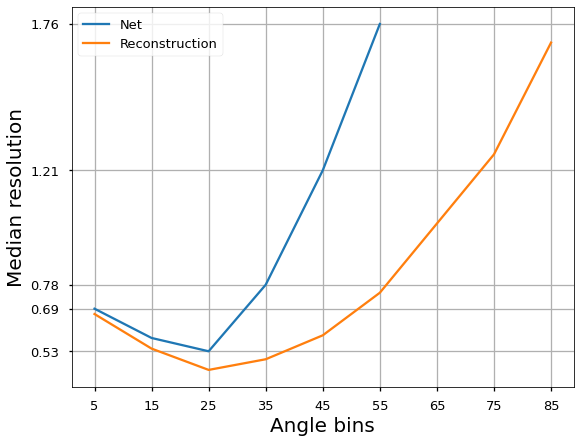

In [25]:
plt.figure(figsize = (9,7) )
plt.plot(np.arange(5,65,10),[0.69, 0.58,0.53, 0.78, 1.21, 1.76],label = "Net")
plt.xlabel("Angle bins",fontsize =20);plt.ylabel("Median resolution",fontsize =20)
plt.yticks([0.69, 0.53, 0.78, 1.21, 1.76]);plt.grid()
plt.xticks((np.arange(5,95,10)))
plt.plot((np.arange(5,95,10)),[0.67, 0.54, 0.46, 0.5, 0.59, 0.75, 1.01, 1.27, 1.69],label = "Reconstruction")
plt.legend();plt.show()

In [ ]:
plt.figure(figsize = (9,7) )
plt.plot((np.arange(5,65,10)),list(res_bins["train"].values())[:-3],label = "Net")
plt.xlabel("Angle bins",fontsize =20);plt.ylabel("Median resolution",fontsize =20)
plt.yticks([0.69, 0.53,0.58, 0.78, 1.21, 1.76]);plt.grid()
plt.xticks((np.arange(5,95,10)))
plt.plot((np.arange(5,95,10)),[0.67, 0.54, 0.46, 0.5, 0.59, 0.75, 1.01, 1.27, 1.69],label = "Reconstruction")
plt.legend();plt.show()

# not actual

# power 3

torch.Size([512, 2])
Num of sub-epochs in Epoch =  26 

Indeed Epoch =  1     Indeed Epoch =  2     Indeed Epoch =  3     Indeed Epoch =  4     Indeed Epoch =  5     Indeed Epoch =  6     Indeed Epoch =  7     Indeed Epoch =  8     Indeed Epoch =  9     Indeed Epoch =  10     Indeed Epoch =  11     Indeed Epoch =  12     Indeed Epoch =  13     Indeed Epoch =  14     Indeed Epoch =  15     Indeed Epoch =  16     Indeed Epoch =  17     Indeed Epoch =  18     Indeed Epoch =  19     Indeed Epoch =  20     Indeed Epoch =  21     Indeed Epoch =  22     Indeed Epoch =  23     Indeed Epoch =  24     Indeed Epoch =  25     Indeed Epoch =  26     Indeed Epoch =  27     Indeed Epoch =  28     Indeed Epoch =  29     Indeed Epoch =  30     Indeed Epoch =  31     Indeed Epoch =  32     Indeed Epoch =  33     Indeed Epoch =  34     Indeed Epoch =  35     

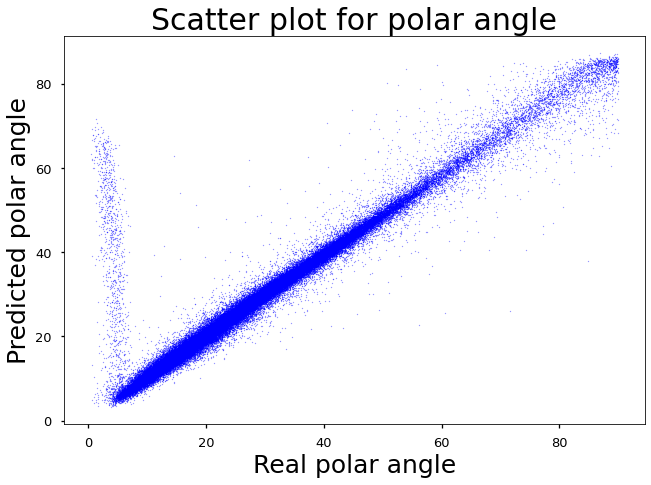

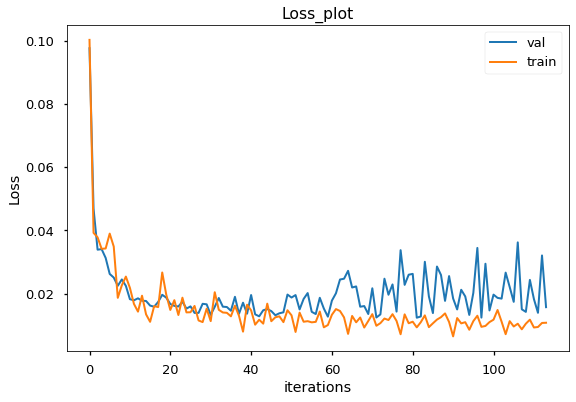

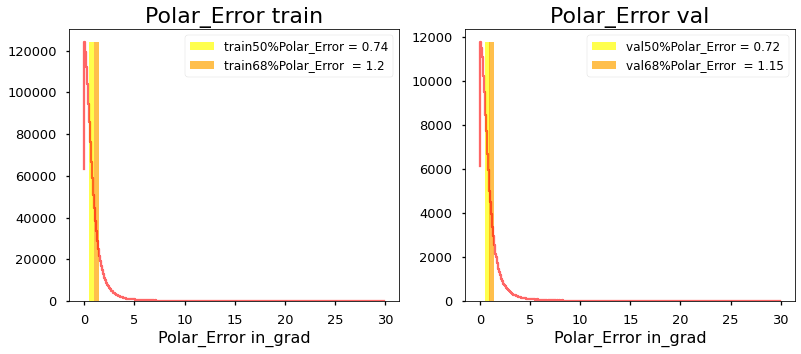

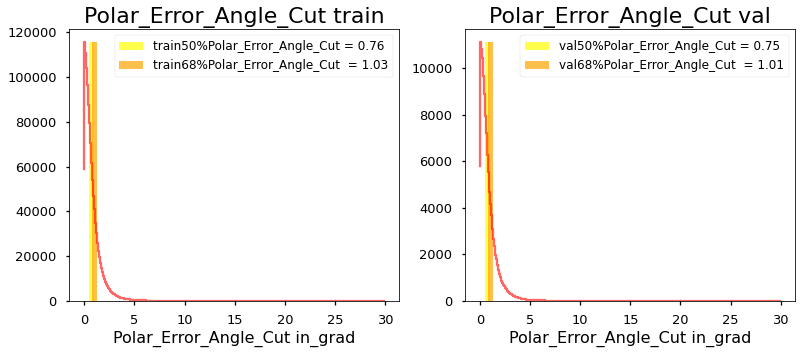

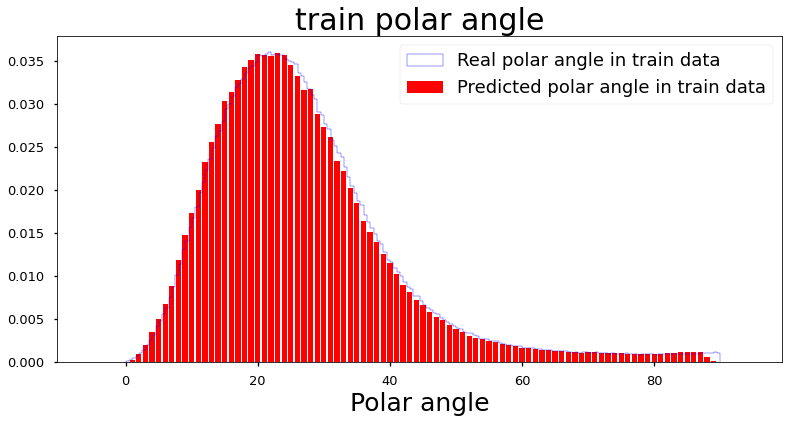

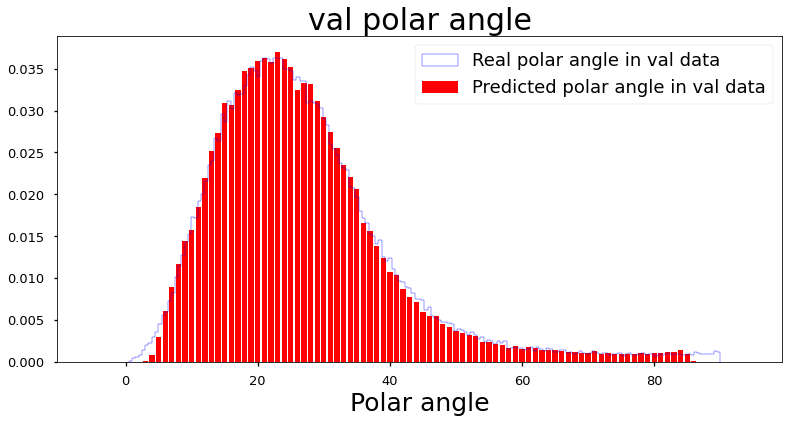

In [7]:
power = 3
bias_mask = False
class ResNet_Block_power(torch.nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.module = torch.nn.Sequential(    
            torch.nn.Conv1d(input_size, input_size*power,  kernel_size=3, stride=1,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power, input_size*power,  kernel_size=3, stride=1,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power,input_size,  kernel_size=3, stride= 1 ,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
          )
        self.conv = torch.nn.Sequential( 
            torch.nn.Conv1d(input_size, input_size, kernel_size =1,bias =  bias_mask),
            torch.nn.PReLU()
        )
    def forward(self, inputs):
          return  (self.module(inputs) +self.conv(inputs))
a = torch.ones((512,5 ,32))
net_MC_data_power3 = torch.nn.Sequential(    
    torch.nn.Conv1d(5, 5,  kernel_size= 3 , stride = 1 ,padding= 1 ,bias = bias_mask),
    torch.nn.BatchNorm1d(5),
    torch.nn.PReLU(),
    ResNet_Block_power(5), #32
    ResNet_Block_power(5), 
    Transition_Block(5), #16
    ResNet_Block_power(10),
    ResNet_Block_power(10), #16
    Transition_Block(10), #8
    ResNet_Block_power(20),
    ResNet_Block_power(20), 
    Transition_Block(20), #4
    ResNet_Block_power(40),
    ResNet_Block_power(40), # 4
    torch.nn.Flatten(),
    torch.nn.Linear(160,160),
    torch.nn.BatchNorm1d(160),
    torch.nn.PReLU(),
    torch.nn.Linear(160,160),
    torch.nn.BatchNorm1d(160),
    torch.nn.PReLU(),
    torch.nn.Linear(160 ,2)
) 


print(net_MC_data_power3(a).shape )
sum(p.numel() for p in net_MC_data_power3.parameters()   )

model_power3 = net_MC_data_power3.to(device)
opt_power3 = torch.optim.Adam(model_power3.parameters(),lr=6e-3)

sch_Exp_power3 = torch.optim.lr_scheduler.ExponentialLR(opt_power3, gamma=0.925)
sch_MultiStep_power3 = torch.optim.lr_scheduler.MultiStepLR(opt_power3,milestones=[6,12,18,24,30], gamma=0.95) 
loss_lists, polar_hists ,polar_error =fitting(model_power3, sch_Exp_power3 , sch_MultiStep_power3, opt_power3,
                                                                       suffix = "Nu_MAE_only_polar_MC_data_wider_power3",
                                                                       epochs_num = 35, batch_size =64)


# Inception NET

torch.Size([512, 2])
Num of sub-epochs in Epoch =  26 

Indeed Epoch =  1     Indeed Epoch =  2     Indeed Epoch =  3     Indeed Epoch =  4     Indeed Epoch =  5     Indeed Epoch =  6     Indeed Epoch =  7     Indeed Epoch =  8     Indeed Epoch =  9     Indeed Epoch =  10     Indeed Epoch =  11     Indeed Epoch =  12     Indeed Epoch =  13     Indeed Epoch =  14     Indeed Epoch =  15     Indeed Epoch =  16     Indeed Epoch =  17     Indeed Epoch =  18     Indeed Epoch =  19     Indeed Epoch =  20     

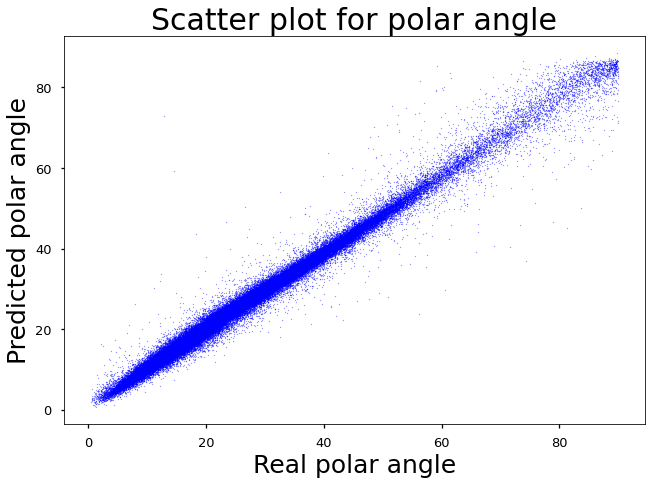

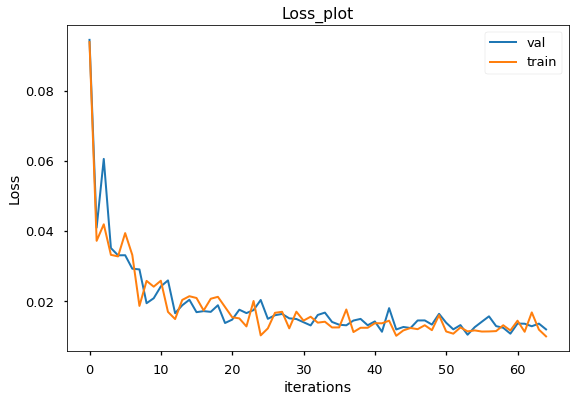

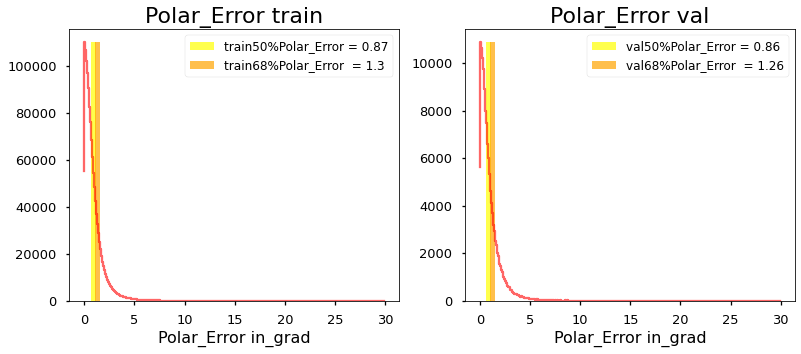

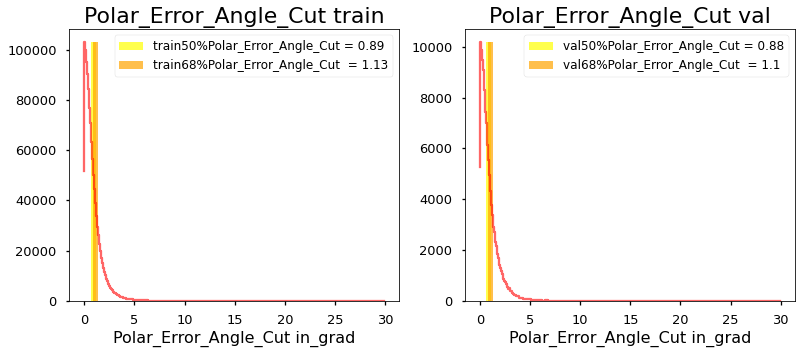

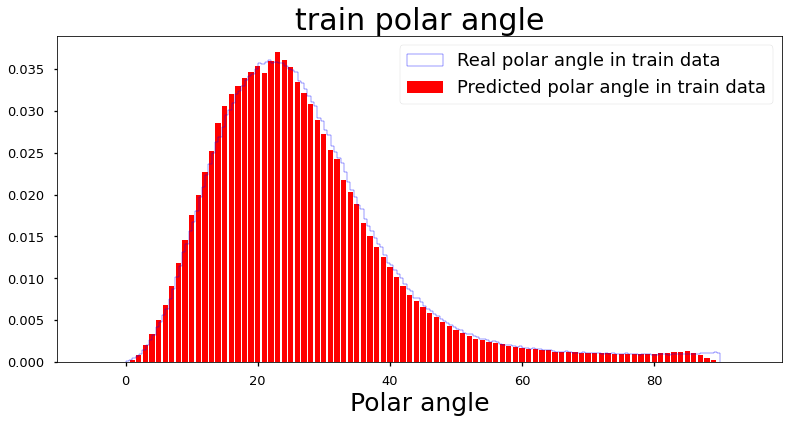

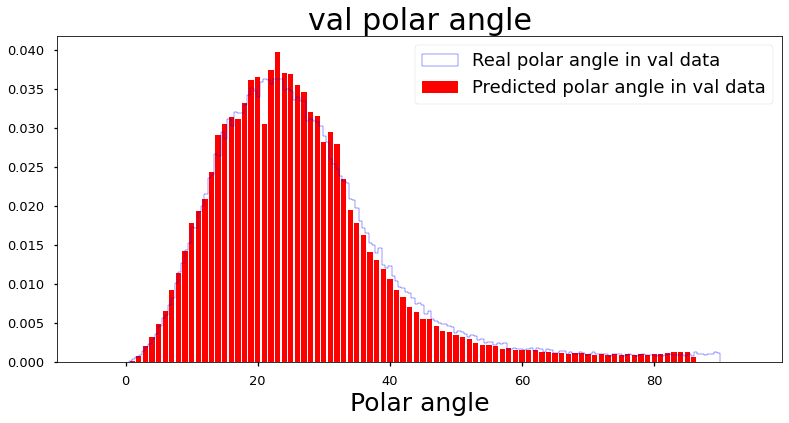

In [10]:
power = 4
power_5 = 1
bias_mask = False
class ResNet_Block_power_inception(torch.nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.module = torch.nn.Sequential(    
            torch.nn.Conv1d(input_size, input_size*power,  kernel_size=3, stride=1,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power, input_size*power,  kernel_size=3, stride=1,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power,input_size,  kernel_size=3, stride= 1 ,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
          )
        self.module5x5 = torch.nn.Sequential(    
            torch.nn.Conv1d(input_size, input_size*power_5,  kernel_size=5, stride=1,padding=2,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power_5),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power_5, input_size*power_5,  kernel_size=5, stride=1,padding=2,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power_5),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power_5,input_size,  kernel_size=5, stride= 1 ,padding=2,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
          )
        self.unite = torch.nn.Sequential( 
            torch.nn.Conv1d(input_size*2, input_size, kernel_size =1,bias =  bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
        )
        self.conv = torch.nn.Sequential( 
            torch.nn.Conv1d(input_size, input_size, kernel_size =1,bias =  bias_mask),
            torch.nn.PReLU()
        )
    def forward(self, inputs):
        x3 = self.module(inputs)
        x5 = self.module5x5(inputs)
        x_unite = self.unite(torch.cat([x3,x5], dim=1) )
        return  (x_unite +self.conv(inputs))
a = torch.ones((512,5 ,32))
bigger_net_polar_end_to_vec_inception = torch.nn.Sequential(    
    torch.nn.Conv1d(5, 5,  kernel_size= 3 , stride = 1 ,padding= 1 ,bias = bias_mask),
    torch.nn.BatchNorm1d(5),
    torch.nn.PReLU(),
    ResNet_Block_power_inception(5), #32
    ResNet_Block_power_inception(5), 
    Transition_Block(5), #16
    ResNet_Block_power_inception(10),
    ResNet_Block_power_inception(10), #16
    Transition_Block(10), #8
    ResNet_Block_power_inception(20),
    ResNet_Block_power_inception(20), 
    Transition_Block(20), #4
    ResNet_Block_power_inception(40),
    ResNet_Block_power_inception(40), # 4
    torch.nn.Flatten(),
    torch.nn.Linear(160,160),
    torch.nn.BatchNorm1d(160),
    torch.nn.PReLU(),
    torch.nn.Linear(160,160),
    torch.nn.BatchNorm1d(160),
    torch.nn.PReLU(),
    torch.nn.Linear(160 ,2)
) 


print(bigger_net_polar_end_to_vec_inception(a).shape )
sum(p.numel() for p in bigger_net_polar_end_to_vec_inception.parameters()   )


model_inception = bigger_net_polar_end_to_vec_inception.to(device)
learn_rate =2e-2
opt_inception = torch.optim.Adam(model_inception.parameters(),lr=learn_rate)
sch_Exp_inception = torch.optim.lr_scheduler.ExponentialLR(opt_inception, gamma=0.95)
sch_MultiStep_inception = torch.optim.lr_scheduler.MultiStepLR(opt_inception,milestones=[6,12,18,24,30], gamma=0.8) 
loss_lists, polar_hists,polar_error =fitting(model_inception,sch_Exp_inception , sch_MultiStep_inception, opt_inception,                                                                  
                                                                       suffix = "Nu_MAE_only_polar_MC_data_inception",
                                                                       epochs_num=20, batch_size =64)

Num of sub-epochs in Epoch =  26 

Indeed Epoch =  1     Indeed Epoch =  2     Indeed Epoch =  3     Indeed Epoch =  4     Indeed Epoch =  5     Indeed Epoch =  6     Indeed Epoch =  7     Indeed Epoch =  8     Indeed Epoch =  9     Indeed Epoch =  10     

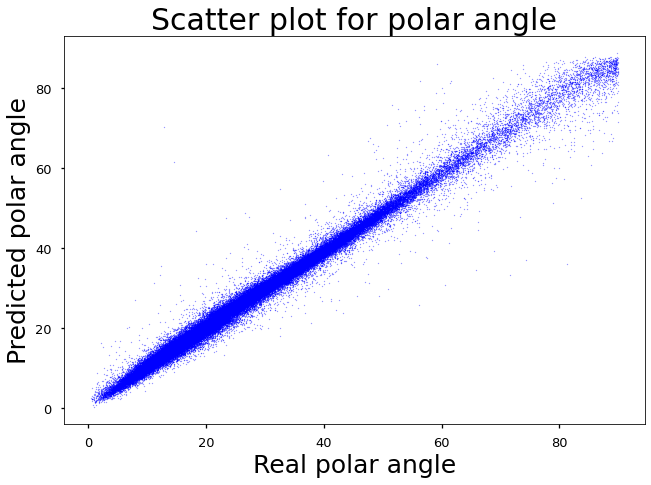

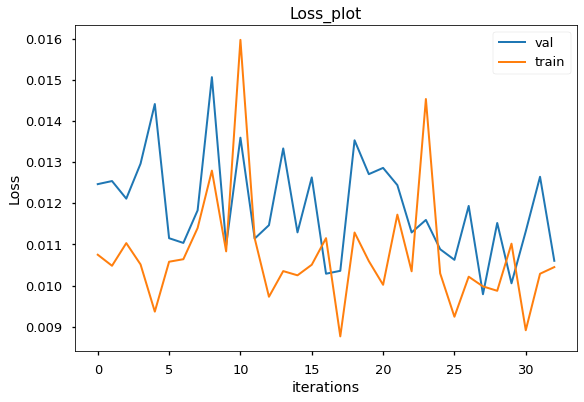

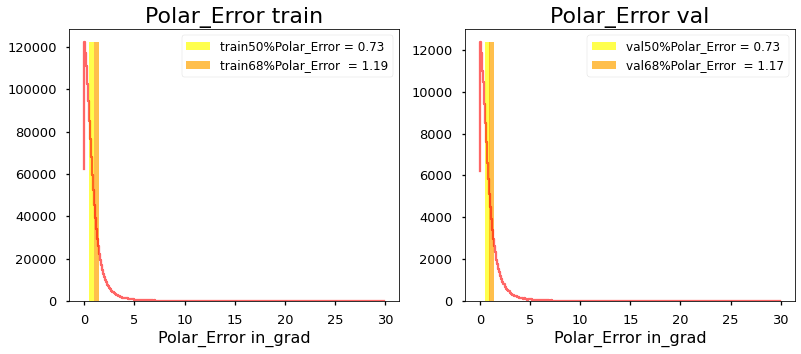

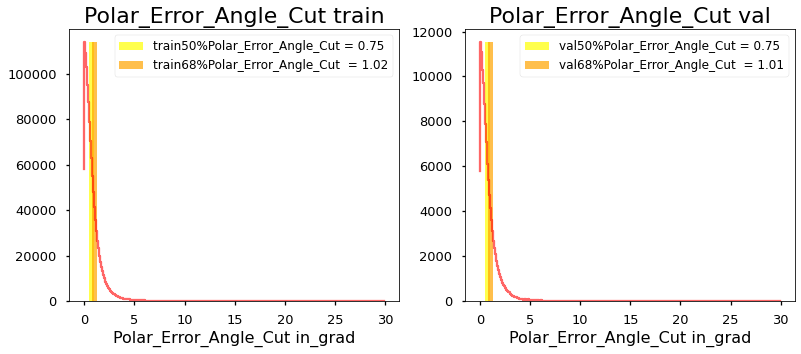

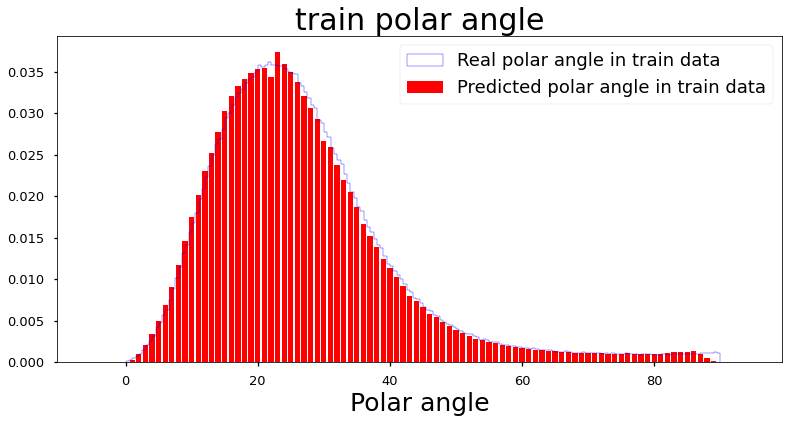

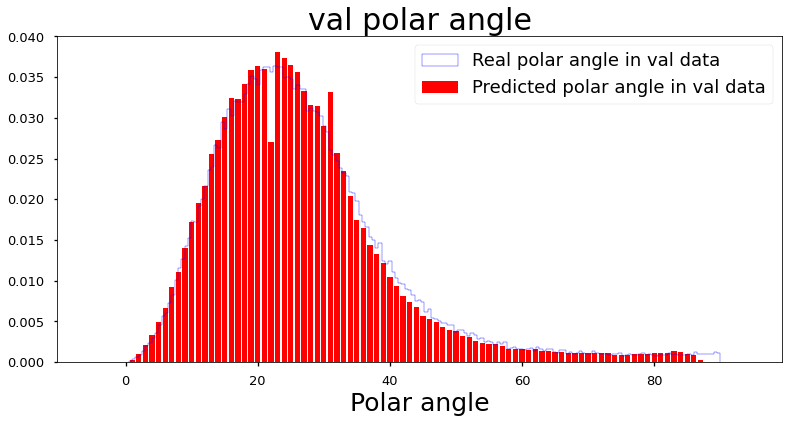

In [11]:
loss_lists, polar_hists,polar_error =fitting(model_inception,sch_Exp_inception , sch_MultiStep_inception, opt_inception,                                                                  
                                                                       suffix = "Nu_MAE_only_polar_MC_data_inception_30ep",
                                                                       epochs_num=10, batch_size =64)

Num of sub-epochs in Epoch =  26 

Indeed Epoch =  1     Indeed Epoch =  2     Indeed Epoch =  3     Indeed Epoch =  4     Indeed Epoch =  5     

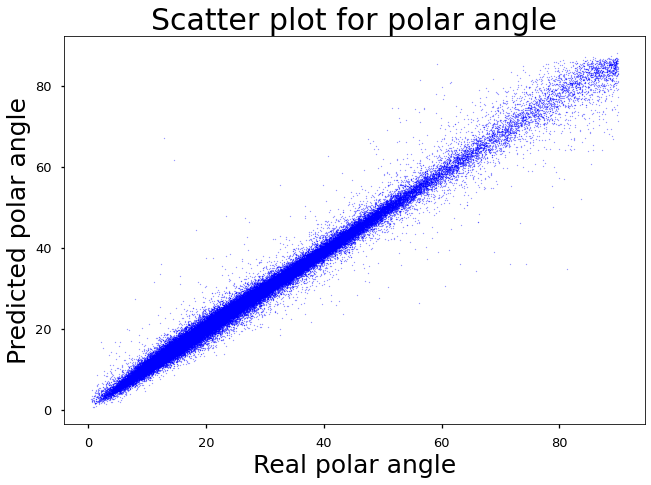

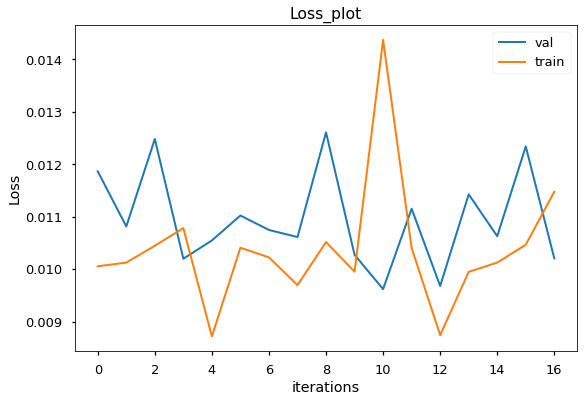

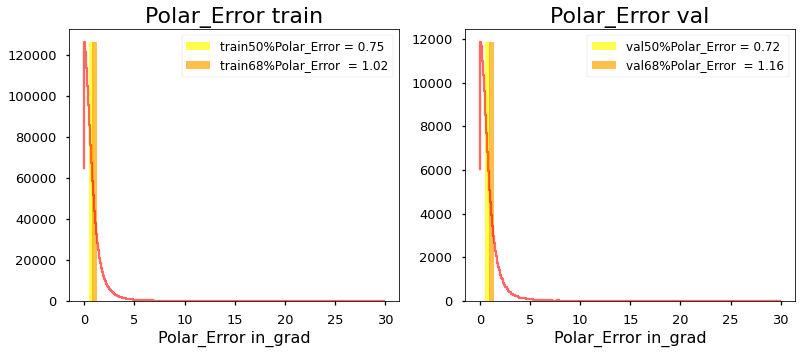

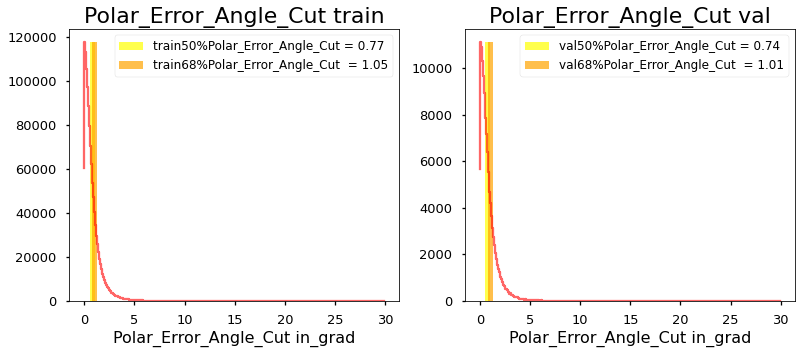

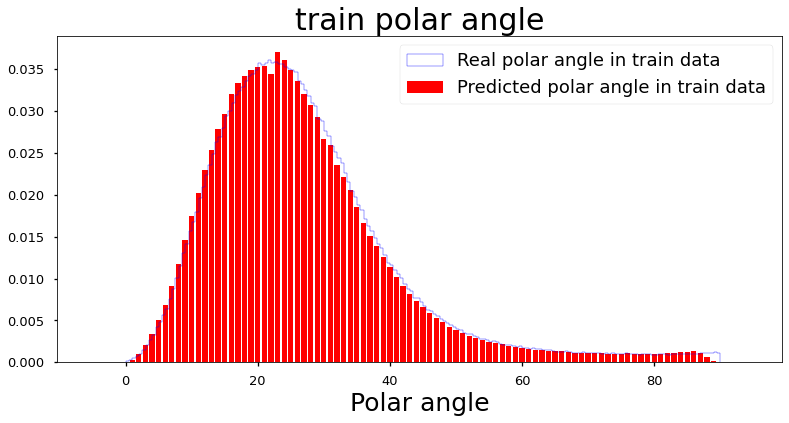

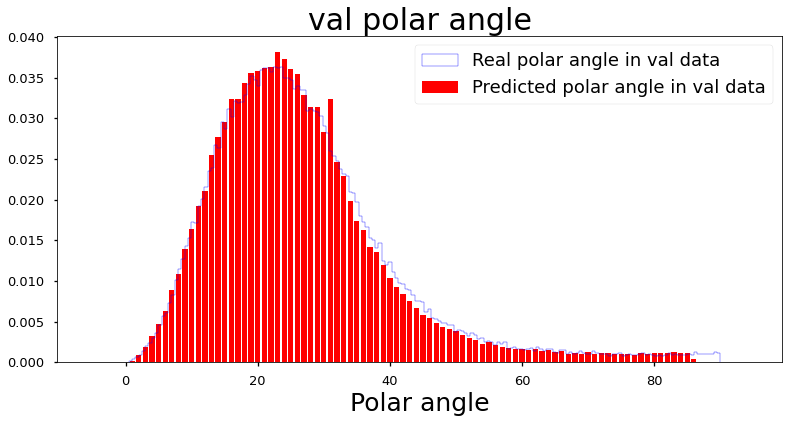

In [12]:
loss_lists, polar_hists,polar_error =fitting(model_inception,sch_Exp_inception , sch_MultiStep_inception, opt_inception,                                                                  
                                                                       suffix = "Nu_MAE_only_polar_MC_data_inception_35ep",
                                                                       epochs_num=5, batch_size =64)

torch.Size([512, 2])
Num of sub-epochs in Epoch =  26 

Indeed Epoch =  1     Indeed Epoch =  2     Indeed Epoch =  3     Indeed Epoch =  4     Indeed Epoch =  5     Indeed Epoch =  6     Indeed Epoch =  7     Indeed Epoch =  8     Indeed Epoch =  9     Indeed Epoch =  10     Indeed Epoch =  11     Indeed Epoch =  12     Indeed Epoch =  13     Indeed Epoch =  14     Indeed Epoch =  15     Indeed Epoch =  16     Indeed Epoch =  17     Indeed Epoch =  18     Indeed Epoch =  19     Indeed Epoch =  20     

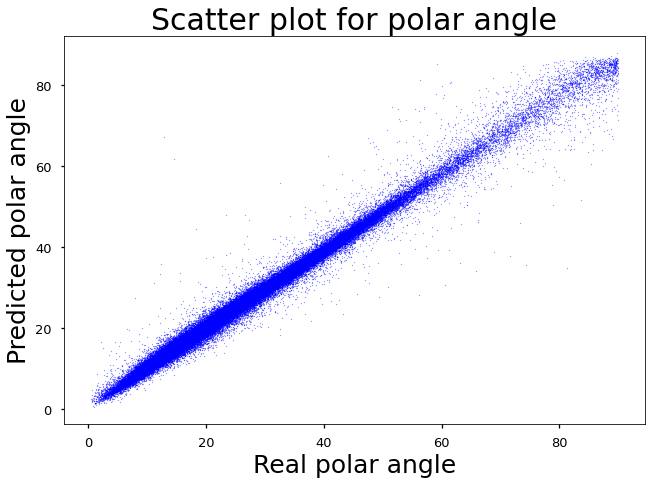

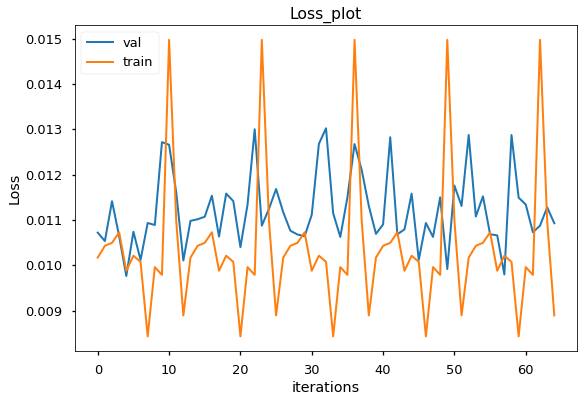

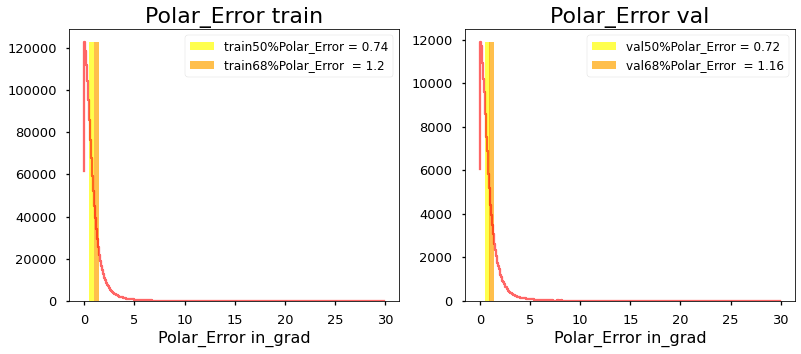

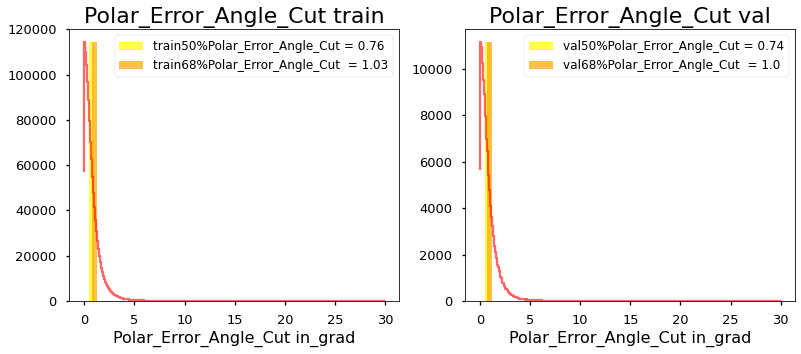

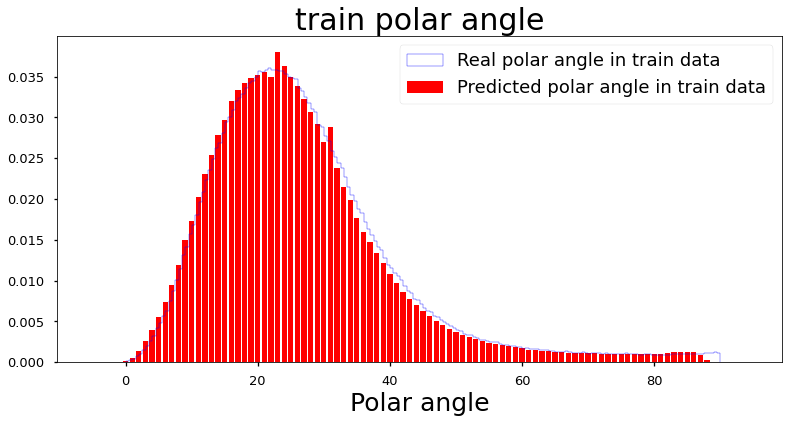

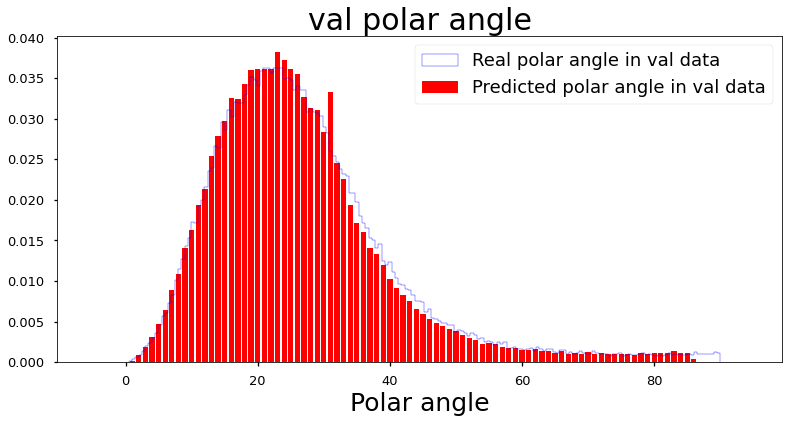

In [13]:
power = 4
power_5 = 1
bias_mask = False
class ResNet_Block_power_inception_135(torch.nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.module = torch.nn.Sequential(    
            torch.nn.Conv1d(input_size, input_size*power,  kernel_size=3, stride=1,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power, input_size*power,  kernel_size=3, stride=1,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power,input_size,  kernel_size=3, stride= 1 ,padding=1,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
          )
        self.module5x5 = torch.nn.Sequential(    
            torch.nn.Conv1d(input_size, input_size*power_5,  kernel_size=5, stride=1,padding=2,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power_5),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power_5, input_size*power_5,  kernel_size=5, stride=1,padding=2,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power_5),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size*power_5,input_size,  kernel_size=5, stride= 1 ,padding=2,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
          )
        self.module1x1 = torch.nn.Sequential(    
            torch.nn.Conv1d(input_size, input_size*power_5,  kernel_size=1, stride=1,padding=0,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power_5),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size, input_size*power_5,  kernel_size=1, stride=1,padding=0,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size*power_5),
            torch.nn.PReLU(),
            torch.nn.Conv1d(input_size, input_size*power_5,  kernel_size=1, stride=1,padding=0,bias = bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
          )
        self.unite = torch.nn.Sequential( 
            torch.nn.Conv1d(input_size*3, input_size, kernel_size =1,bias =  bias_mask),
            torch.nn.BatchNorm1d(input_size),
            torch.nn.PReLU()
        )
        self.conv = torch.nn.Sequential( 
            torch.nn.Conv1d(input_size, input_size, kernel_size =1,bias =  bias_mask),
            torch.nn.PReLU()
        )
    def forward(self, inputs):
        x3 = self.module(inputs)
        x5 = self.module5x5(inputs)
        x1 = self.module1x1(inputs)
        x_unite = self.unite(torch.cat([x1,x3,x5], dim=1) )
        return  (x_unite +self.conv(inputs))
a = torch.ones((512,5 ,32))
bigger_net_polar_end_to_vec_inception_135 = torch.nn.Sequential(    
    torch.nn.Conv1d(5, 5,  kernel_size= 3 , stride = 1 ,padding= 1 ,bias = bias_mask),
    torch.nn.BatchNorm1d(5),
    torch.nn.PReLU(),
    ResNet_Block_power_inception_135(5), #32
    ResNet_Block_power_inception_135(5), 
    Transition_Block(5), #16
    ResNet_Block_power_inception_135(10),
    ResNet_Block_power_inception_135(10), #16
    Transition_Block(10), #8
    ResNet_Block_power_inception_135(20),
    ResNet_Block_power_inception_135(20), 
    Transition_Block(20), #4
    ResNet_Block_power_inception_135(40),
    ResNet_Block_power_inception_135(40), # 4
    torch.nn.Flatten(),
    torch.nn.Linear(160,160),
    torch.nn.BatchNorm1d(160),
    torch.nn.PReLU(),
    torch.nn.Linear(160,160),
    torch.nn.BatchNorm1d(160),
    torch.nn.PReLU(),
    torch.nn.Linear(160 ,2)
) 


print(bigger_net_polar_end_to_vec_inception_135(a).shape )
sum(p.numel() for p in bigger_net_polar_end_to_vec_inception_135.parameters()   )


model_inception_135 = bigger_net_polar_end_to_vec_inception_135.to(device)
learn_rate =4e-3
opt_inception_135 = torch.optim.Adam(model_inception_135.parameters(),lr=learn_rate)
sch_Exp_inception_135 = torch.optim.lr_scheduler.ExponentialLR(opt_inception_135, gamma=0.92)
sch_MultiStep_inception_135 = torch.optim.lr_scheduler.MultiStepLR(opt_inception_135,milestones=[6,12,18,24,30], gamma=0.95) 
loss_lists, polar_hists,polar_error =fitting(model_inception,sch_Exp_inception_135 , sch_MultiStep_inception_135,
                                             opt_inception_135,                                                                  
                                                                       suffix = "Nu_MAE_only_polar_MC_data_inception_135",
                                                                       epochs_num=20, batch_size =64)